In [372]:
Набор Данных:

Все пациенты перенесли сердечные приступы в прошлом. Некоторые из них еще живы, а некоторые нет. Переменные "выживание" и "еще-живы" в совокупности говорят о том, выжил ли пациент в течение года. 

Attribute Information:
C1. survival -- the number of months patient survived (has survived, if patient is still alive). Because all the patients had their heart attacks at different times, it is possible that some patients have survived less than one year but they are still alive. Check the second variable to confirm this. Such patients cannot be used for the prediction task mentioned above. 
C2. still-alive -- a binary variable. 0=dead at end of survival period, 1 means still alive 
C3. age-at-heart-attack -- age in years when heart attack occurred 
C4. pericardial-effusion -- binary. Pericardial effusion is fluid around the heart. 0=no fluid, 1=fluid 
C5. fractional-shortening -- a measure of contracility around the heart lower numbers are increasingly abnormal 
C6. epss -- E-point septal separation, another measure of contractility. Larger numbers are increasingly abnormal. 
C7. lvdd -- left ventricular end-diastolic dimension. This is a measure of the size of the heart at end-diastole. Large hearts tend to be sick hearts. 
C8. wall-motion-score -- a measure of how the segments of the left ventricle are moving 
C9. wall-motion-index -- equals wall-motion-score divided by number of segments seen. Usually 12-13 segments are seen in an echocardiogram. Use this variable INSTEAD of the wall motion score. 
C10. mult -- a derivate var which can be ignored 
C11. name -- the name of the patient (I have replaced them with "name") 
C12. group -- meaningless, ignore it 
C13. alive-at-1 -- Boolean-valued. Derived from the first two attributes. 0 means patient was either dead after 1 year or had been followed for less than 1 year. 1 means patient was alive at 1 year.

SyntaxError: invalid syntax (<ipython-input-372-0cc2425ee0e7>, line 1)

In [232]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [233]:
url = 'C:\\Anaconda\\aaa\\echocardiogram.data'
data = pd.read_csv(url, sep = ',', na_values = '?', engine = 'python')

In [234]:
type(data)

pandas.core.frame.DataFrame

In [235]:
data

,11,0,71,0.1,0.260,9,4.600,14,1,1.1,name,1.2,0.2
0,19.00,0.0,72.000,0.0,0.380,6.000,4.100,14.00,1.700,0.588,name,1.0,0.0
1,16.00,0.0,55.000,0.0,0.260,4.000,3.420,14.00,1.000,1.000,name,1.0,0.0
2,57.00,0.0,60.000,0.0,0.253,12.062,4.603,16.00,1.450,0.788,name,1.0,0.0
3,19.00,1.0,57.000,0.0,0.160,22.000,5.750,18.00,2.250,0.571,name,1.0,0.0
4,26.00,0.0,68.000,0.0,0.260,5.000,4.310,12.00,1.000,0.857,name,1.0,0.0
5,13.00,0.0,62.000,0.0,0.230,31.000,5.430,22.50,1.875,0.857,name,1.0,0.0
6,50.00,0.0,60.000,0.0,0.330,8.000,5.250,14.00,1.000,1.000,name,1.0,0.0
7,19.00,0.0,46.000,0.0,0.340,0.000,5.090,16.00,1.140,1.003,name,1.0,0.0
8,25.00,0.0,54.000,0.0,0.140,13.000,4.490,15.50,1.190,0.930,name,1.0,0.0
9,10.00,1.0,77.000,0.0,0.130,16.000,4.230,18.00,1.800,0.714,name,1.0,1.0


In [236]:
data.columns = ['C' + str(i) for i in range(1, 14)]
data

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13
0,19.00,0.0,72.000,0.0,0.380,6.000,4.100,14.00,1.700,0.588,name,1.0,0.0
1,16.00,0.0,55.000,0.0,0.260,4.000,3.420,14.00,1.000,1.000,name,1.0,0.0
2,57.00,0.0,60.000,0.0,0.253,12.062,4.603,16.00,1.450,0.788,name,1.0,0.0
3,19.00,1.0,57.000,0.0,0.160,22.000,5.750,18.00,2.250,0.571,name,1.0,0.0
4,26.00,0.0,68.000,0.0,0.260,5.000,4.310,12.00,1.000,0.857,name,1.0,0.0
5,13.00,0.0,62.000,0.0,0.230,31.000,5.430,22.50,1.875,0.857,name,1.0,0.0
6,50.00,0.0,60.000,0.0,0.330,8.000,5.250,14.00,1.000,1.000,name,1.0,0.0
7,19.00,0.0,46.000,0.0,0.340,0.000,5.090,16.00,1.140,1.003,name,1.0,0.0
8,25.00,0.0,54.000,0.0,0.140,13.000,4.490,15.50,1.190,0.930,name,1.0,0.0
9,10.00,1.0,77.000,0.0,0.130,16.000,4.230,18.00,1.800,0.714,name,1.0,1.0


In [237]:
print(data)

        C1   C2      C3   C4     C5      C6     C7     C8     C9    C10   C11  \
0    19.00  0.0  72.000  0.0  0.380   6.000  4.100  14.00  1.700  0.588  name   
1    16.00  0.0  55.000  0.0  0.260   4.000  3.420  14.00  1.000  1.000  name   
2    57.00  0.0  60.000  0.0  0.253  12.062  4.603  16.00  1.450  0.788  name   
3    19.00  1.0  57.000  0.0  0.160  22.000  5.750  18.00  2.250  0.571  name   
4    26.00  0.0  68.000  0.0  0.260   5.000  4.310  12.00  1.000  0.857  name   
5    13.00  0.0  62.000  0.0  0.230  31.000  5.430  22.50  1.875  0.857  name   
6    50.00  0.0  60.000  0.0  0.330   8.000  5.250  14.00  1.000  1.000  name   
7    19.00  0.0  46.000  0.0  0.340   0.000  5.090  16.00  1.140  1.003  name   
8    25.00  0.0  54.000  0.0  0.140  13.000  4.490  15.50  1.190  0.930  name   
9    10.00  1.0  77.000  0.0  0.130  16.000  4.230  18.00  1.800  0.714  name   
10   52.00  0.0  62.000  1.0  0.450   9.000  3.600  16.00  1.140  1.003  name   
11   52.00  0.0  73.000  0.0

In [238]:
data.head()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13
0,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,0.588,name,1.0,0.0
1,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,1.000,name,1.0,0.0
2,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0.788,name,1.0,0.0
3,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.571,name,1.0,0.0
4,26.0,0.0,68.0,0.0,0.260,5.000,4.310,12.0,1.00,0.857,name,1.0,0.0


In [239]:
data.tail()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13
126,7.5,1.0,64.0,0.0,0.24,12.9,4.72,12.0,1.000,0.857,name,NaN,NaN
127,41.0,0.0,64.0,0.0,0.28,5.4,5.47,11.0,1.100,0.714,name,NaN,NaN
128,36.0,0.0,69.0,0.0,0.20,7.0,5.05,14.5,1.210,0.857,name,NaN,NaN
129,22.0,0.0,57.0,0.0,0.14,16.1,4.36,15.0,1.360,0.786,name,NaN,NaN
130,20.0,0.0,62.0,0.0,0.15,0.0,4.51,15.5,1.409,0.786,name,NaN,NaN


Attribute Information:
C1. survival -- the number of months patient survived (has survived, if patient is still alive). Because all the patients had their heart attacks at different times, it is possible that some patients have survived less than one year but they are still alive. Check the second variable to confirm this. Such patients cannot be used for the prediction task mentioned above. 
C2. still-alive -- a binary variable. 0=dead at end of survival period, 1 means still alive 
C3. age-at-heart-attack -- age in years when heart attack occurred 
C4. pericardial-effusion -- binary. Pericardial effusion is fluid around the heart. 0=no fluid, 1=fluid 
C5. fractional-shortening -- a measure of contracility around the heart lower numbers are increasingly abnormal 
C6. epss -- E-point septal separation, another measure of contractility. Larger numbers are increasingly abnormal. 
C7. lvdd -- left ventricular end-diastolic dimension. This is a measure of the size of the heart at end-diastole. Large hearts tend to be sick hearts. 
C8. wall-motion-score -- a measure of how the segments of the left ventricle are moving 
C9. wall-motion-index -- equals wall-motion-score divided by number of segments seen. Usually 12-13 segments are seen in an echocardiogram. Use this variable INSTEAD of the wall motion score. 
C10. mult -- a derivate var which can be ignored 
C11. name -- the name of the patient (I have replaced them with "name") 
C12. group -- meaningless, ignore it 
C13. alive-at-1 -- Boolean-valued. Derived from the first two attributes. 0 means patient was either dead after 1 year or had been followed for less than 1 year. 1 means patient was alive at 1 year.

In [240]:
print(data.shape)
print(data.columns)

(131, 13)
Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11',
       'C12', 'C13'],
      dtype='object')


In [241]:
data.index

RangeIndex(start=0, stop=131, step=1)

In [242]:
data.at[2, 'C6']

12.062000000000001

In [243]:
data['C6']

0       6.000
1       4.000
2      12.062
3      22.000
4       5.000
5      31.000
6       8.000
7       0.000
8      13.000
9      16.000
10      9.000
11      6.000
12     10.000
13     23.000
14     12.063
15     11.000
16     20.000
17     17.000
18     15.000
19     12.000
20     19.000
21     12.733
22      0.000
23      5.900
24      7.000
25      5.000
26      7.000
27        NaN
28      4.200
29        NaN
        ...  
101     0.000
102    11.800
103     6.900
104    14.300
105     9.700
106     7.000
107    40.000
108     7.600
109    12.100
110    13.600
111     9.000
112     9.200
113     9.400
114    28.900
115     0.000
116     9.300
117    28.600
118    19.100
119     6.600
120     0.000
121     0.000
122    13.200
123    12.000
124     6.800
125    25.500
126    12.900
127     5.400
128     7.000
129    16.100
130     0.000
Name: C6, dtype: float64

In [244]:
data['C6'][3]

22.0

In [245]:
data['C6'].dtype.name

'float64'

In [246]:
type(data['C11'][3])

str

In [247]:
type(data['C11'])

pandas.core.series.Series

In [248]:
data[['C6', 'C11']].head()

,C6,C11
0,6.000,name
1,4.000,name
2,12.062,name
3,22.000,name
4,5.000,name


In [249]:
data.describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C12,C13
count,129.000000,130.000000,126.000000,130.000000,123.000000,116.000000,120.000000,127.000000,130.000000,127.000000,109.000000,73.000000
mean,22.269612,0.330769,62.861341,0.184615,0.216382,12.192052,4.764517,14.441575,1.385692,0.774961,1.788991,0.328767
std,15.889140,0.472310,8.406093,0.389486,0.107881,7.396198,0.813271,5.038290,0.453873,0.198867,0.409910,0.473016
min,0.030000,0.000000,35.000000,0.000000,0.010000,0.000000,2.320000,2.000000,1.000000,0.140000,1.000000,0.000000
25%,7.500000,0.000000,57.000000,0.000000,0.150000,7.000000,4.230000,11.000000,1.000000,0.712000,2.000000,0.000000
50%,24.000000,0.000000,62.000000,0.000000,0.200000,11.000000,4.665000,14.000000,1.226000,0.786000,2.000000,0.000000
75%,33.000000,1.000000,67.750000,0.000000,0.270000,16.100000,5.302500,16.500000,1.547500,0.857000,2.000000,1.000000
max,57.000000,1.000000,86.000000,1.000000,0.610000,40.000000,6.780000,39.000000,3.000000,2.000000,2.000000,1.000000


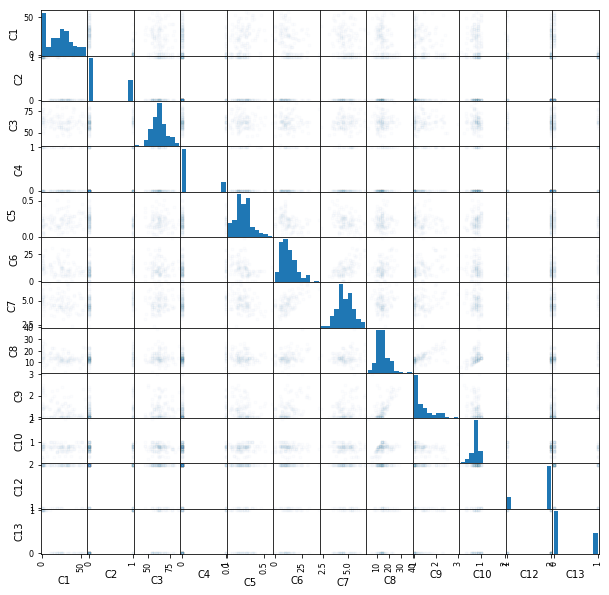

In [250]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

In [251]:
data.corr()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C12,C13
C1,1.000000,-0.717585,-0.203215,-0.156659,0.244513,-0.298828,-0.232921,-0.293578,-0.361205,0.071424,0.045900,-0.768452
C2,-0.717585,1.000000,0.303187,0.171152,-0.292526,0.329093,0.264201,0.272272,0.383972,-0.134532,-0.105722,0.862055
C3,-0.203215,0.303187,1.000000,0.018507,-0.086954,0.049803,0.175633,0.036613,0.076300,-0.170611,-0.075801,0.263984
C4,-0.156659,0.171152,0.018507,1.000000,-0.007978,0.071535,0.062775,0.143308,0.120614,-0.041608,-0.116048,0.221455
C5,0.244513,-0.292526,-0.086954,-0.007978,1.000000,-0.356686,-0.348885,-0.171313,-0.246803,0.097574,-0.038980,-0.291310
C6,-0.298828,0.329093,0.049803,0.071535,-0.356686,1.000000,0.624021,0.371450,0.403958,-0.083577,0.008077,0.310822
C7,-0.232921,0.264201,0.175633,0.062775,-0.348885,0.624021,1.000000,0.146227,0.246784,-0.164827,-0.025178,0.276652
C8,-0.293578,0.272272,0.036613,0.143308,-0.171313,0.371450,0.146227,1.000000,0.646706,0.219126,-0.088992,0.417748
C9,-0.361205,0.383972,0.076300,0.120614,-0.246803,0.403958,0.246784,0.646706,1.000000,-0.338618,-0.063050,0.526397
C10,0.071424,-0.134532,-0.170611,-0.041608,0.097574,-0.083577,-0.164827,0.219126,-0.338618,1.000000,-0.022353,-0.126033


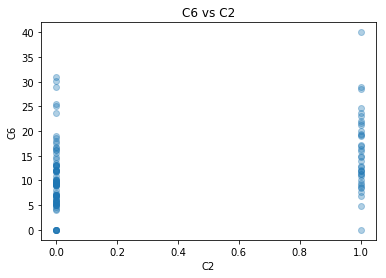

In [252]:
plt.plot(data['C2'], data['C6'], 'o', alpha = 0.35)
plt.xlabel('C2')
plt.ylabel('C6')
plt.title('C6 vs C2')
pass

In [253]:
data['C1'] >= 20

0      False
1      False
2       True
3      False
4       True
5      False
6       True
7      False
8       True
9      False
10      True
11      True
12      True
13     False
14      True
15     False
16     False
17      True
18     False
19     False
20     False
21     False
22     False
23      True
24      True
25      True
26      True
27     False
28      True
29     False
       ...  
101     True
102     True
103    False
104     True
105     True
106     True
107    False
108    False
109     True
110    False
111     True
112     True
113     True
114     True
115     True
116     True
117     True
118     True
119    False
120     True
121     True
122    False
123     True
124    False
125     True
126    False
127     True
128     True
129     True
130     True
Name: C1, dtype: bool

С1 - сколько месяцев после приступа прожил пациент.
С2 - жив или мертв.
C3 - возраст пациента.

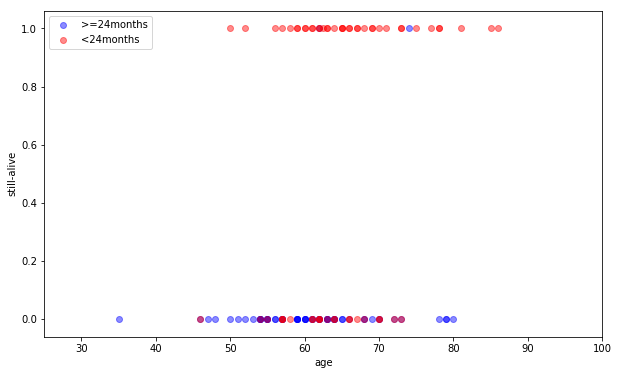

In [254]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['C1'] >= 24]['C3'],
            data[data['C1'] >= 24]['C2'],
            alpha = 0.45,
            label = '>=24months',
            color = 'blue')

plt.scatter(data[data['C1'] < 24]['C3'],
            data[data['C1'] < 24]['C2'],
            alpha = 0.45,
            label = '<24months',
            color = 'red')

plt.xlabel('age')

plt.xlim(25, 100)
plt.ylabel('still-alive')
plt.legend()


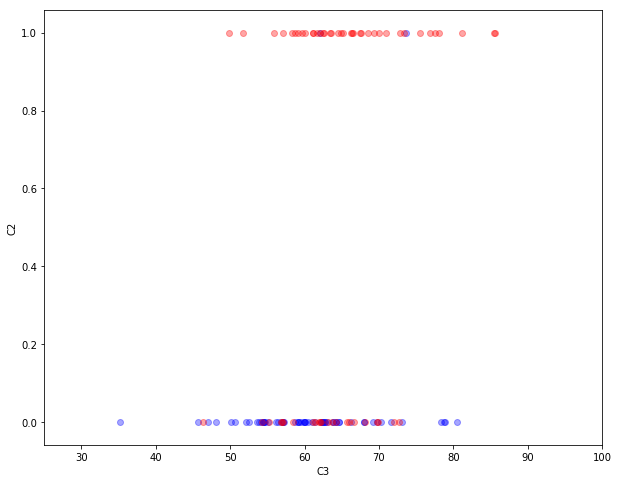

In [255]:
np.random.seed(0)
education_num_rnd = data['C3'] + np.random.rand(data.shape[0]) - .5

plt.figure(figsize = (10, 8))

plt.scatter(education_num_rnd[data['C1'] >= 24],
            data[data['C1'] >= 24]['C2'],
            alpha = 0.35,
            label = '>=24',
            color = 'b')

plt.scatter(education_num_rnd[data['C1'] < 24],
            data[data['C1'] < 24]['C2'],
            alpha = 0.35,
            label = '<24',
            color = 'r')

plt.xlabel('C3')

plt.xlim(25, 100)
plt.ylabel('C2')

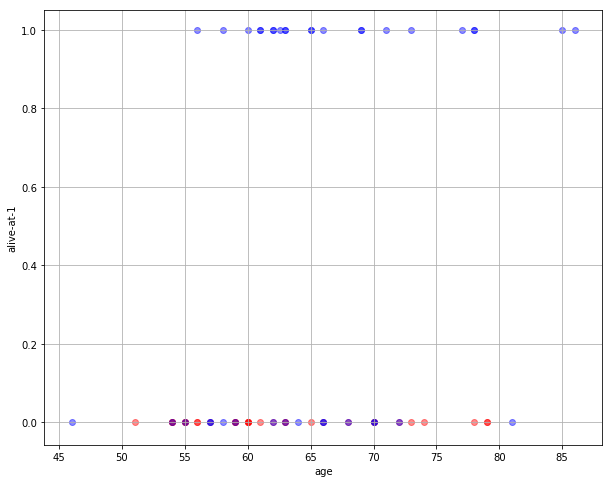

In [256]:
plt.figure(figsize = (10, 8))

plt.scatter(data[data['C1'] >= 24]['C3'],
            data[data['C1'] >= 24]['C13'],
            alpha = 0.45,
            label = '>=24',
            color = 'r')

plt.scatter(data[data['C1'] < 24]['C3'],
            data[data['C1'] < 24]['C13'],
            alpha = 0.45,
            label = '<24',
            color = 'b')

plt.xlabel('age')
plt.ylabel('alive-at-1')
plt.grid()

In [257]:
data.describe(include = ['object'])

,C11
count,131
unique,1
top,name
freq,131


In [258]:
data.describe(include = 'all')

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13
count,129.000000,130.000000,126.000000,130.000000,123.000000,116.000000,120.000000,127.000000,130.000000,127.000000,131,109.000000,73.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,name,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131,NaN,NaN
mean,22.269612,0.330769,62.861341,0.184615,0.216382,12.192052,4.764517,14.441575,1.385692,0.774961,NaN,1.788991,0.328767
std,15.889140,0.472310,8.406093,0.389486,0.107881,7.396198,0.813271,5.038290,0.453873,0.198867,NaN,0.409910,0.473016
min,0.030000,0.000000,35.000000,0.000000,0.010000,0.000000,2.320000,2.000000,1.000000,0.140000,NaN,1.000000,0.000000
25%,7.500000,0.000000,57.000000,0.000000,0.150000,7.000000,4.230000,11.000000,1.000000,0.712000,NaN,2.000000,0.000000
50%,24.000000,0.000000,62.000000,0.000000,0.200000,11.000000,4.665000,14.000000,1.226000,0.786000,NaN,2.000000,0.000000
75%,33.000000,1.000000,67.750000,0.000000,0.270000,16.100000,5.302500,16.500000,1.547500,0.857000,NaN,2.000000,1.000000


In [259]:
data['C11'].unique()

array(['name'], dtype=object)

In [260]:
for name in data['C11'].unique():
    print(name, data['C3'][data['C11'] == name].iloc[0])

name 72.0


In [261]:
data['C3'].unique()

array([ 72.   ,  55.   ,  60.   ,  57.   ,  68.   ,  62.   ,  46.   ,
        54.   ,  77.   ,  73.   ,  69.   ,  62.529,  66.   ,  85.   ,
        71.   ,  64.   ,  35.   ,  75.   ,  65.   ,  52.   ,     nan,
        47.   ,  63.   ,  61.   ,  80.   ,  70.   ,  79.   ,  56.   ,
        67.   ,  81.   ,  59.   ,  58.   ,  51.   ,  50.   ,  78.   ,
        86.   ,  74.   ,  53.   ,  48.   ])

Задача

In [262]:
data.drop(['C10','C11','C12'], axis = 1) 

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C13
0,19.00,0.0,72.000,0.0,0.380,6.000,4.100,14.00,1.700,0.0
1,16.00,0.0,55.000,0.0,0.260,4.000,3.420,14.00,1.000,0.0
2,57.00,0.0,60.000,0.0,0.253,12.062,4.603,16.00,1.450,0.0
3,19.00,1.0,57.000,0.0,0.160,22.000,5.750,18.00,2.250,0.0
4,26.00,0.0,68.000,0.0,0.260,5.000,4.310,12.00,1.000,0.0
5,13.00,0.0,62.000,0.0,0.230,31.000,5.430,22.50,1.875,0.0
6,50.00,0.0,60.000,0.0,0.330,8.000,5.250,14.00,1.000,0.0
7,19.00,0.0,46.000,0.0,0.340,0.000,5.090,16.00,1.140,0.0
8,25.00,0.0,54.000,0.0,0.140,13.000,4.490,15.50,1.190,0.0
9,10.00,1.0,77.000,0.0,0.130,16.000,4.230,18.00,1.800,1.0


Готовим данные.

In [263]:
data['C11'].dtype.name

'object'

In [264]:
data['C2'].dtype.name

'float64'

In [265]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['C11']
['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C12', 'C13']


In [266]:
for c in categorical_columns:
    print(c, data[c].unique())

C11 ['name']


Обрабатываем пропущенные значения

In [267]:
data.median(axis = 0)

C1     24.000
C2      0.000
C3     62.000
C4      0.000
C5      0.200
C6     11.000
C7      4.665
C8     14.000
C9      1.226
C10     0.786
C12     2.000
C13     0.000
dtype: float64

In [268]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [269]:
data[numerical_columns].count(axis = 0)

C1     131
C2     131
C3     131
C4     131
C5     131
C6     131
C7     131
C8     131
C9     131
C10    131
C12    131
C13    131
dtype: int64

In [270]:
data[categorical_columns].count(axis = 0)

C11    131
dtype: int64

In [271]:
data['C11'].describe()

count      131
unique       1
top       name
freq       131
Name: C11, dtype: object

In [272]:
data

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13
0,19.00,0.0,72.000,0.0,0.380,6.000,4.100,14.00,1.700,0.588,name,1.0,0.0
1,16.00,0.0,55.000,0.0,0.260,4.000,3.420,14.00,1.000,1.000,name,1.0,0.0
2,57.00,0.0,60.000,0.0,0.253,12.062,4.603,16.00,1.450,0.788,name,1.0,0.0
3,19.00,1.0,57.000,0.0,0.160,22.000,5.750,18.00,2.250,0.571,name,1.0,0.0
4,26.00,0.0,68.000,0.0,0.260,5.000,4.310,12.00,1.000,0.857,name,1.0,0.0
5,13.00,0.0,62.000,0.0,0.230,31.000,5.430,22.50,1.875,0.857,name,1.0,0.0
6,50.00,0.0,60.000,0.0,0.330,8.000,5.250,14.00,1.000,1.000,name,1.0,0.0
7,19.00,0.0,46.000,0.0,0.340,0.000,5.090,16.00,1.140,1.003,name,1.0,0.0
8,25.00,0.0,54.000,0.0,0.140,13.000,4.490,15.50,1.190,0.930,name,1.0,0.0
9,10.00,1.0,77.000,0.0,0.130,16.000,4.230,18.00,1.800,0.714,name,1.0,1.0


Векторизация

In [273]:
data_describe = data.describe(include=[object])
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 1]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 1]
print(binary_columns, nonbinary_columns)

['C11'] []


In [274]:
data['C11'].unique()

array(['name'], dtype=object)

In [333]:
for c in range(0, 65):
    data.at[c, 'C11'] = '1'
for c in range(65, 131):
    data.at[c, 'C11'] = '0'
    
data['C11'].describe()

count     131
unique      2
top         0
freq       66
Name: C11, dtype: object

Небинарных признаков нет.

Нормализация количественных признаков

In [334]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C12,C13
count,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,131.000000,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02
mean,-2.690808e-17,8.305485e-17,3.697212e-17,-1.127173e-16,5.932489e-18,0.000000,3.813743e-18,2.754370e-17,-2.680214e-17,1.970434e-17,1.519565e-15,-1.059373e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.412113e+00,-6.963521e-01,-3.375391e+00,-4.717911e-01,-1.963816e+00,-1.730418,-3.128916e+00,-2.505281e+00,-8.499677e-01,-3.244750e+00,-2.158659e+00,-4.717911e-01
25%,-8.908001e-01,-6.963521e-01,-6.463042e-01,-4.717911e-01,-6.251658e-01,-0.646714,-5.987193e-01,-6.406463e-01,-8.499677e-01,-3.130749e-01,4.597144e-01,-4.717911e-01
50%,1.080659e-01,-6.963521e-01,-1.004869e-01,-4.717911e-01,-1.470764e-01,-0.151511,-1.170830e-01,-8.629560e-02,-3.503421e-01,5.466139e-02,4.597144e-01,-4.717911e-01
75%,6.788464e-01,1.425093e+00,5.059768e-01,-4.717911e-01,4.744399e-01,0.408283,6.406915e-01,3.672641e-01,3.327743e-01,4.172902e-01,4.597144e-01,-4.717911e-01
max,2.200928e+00,1.425093e+00,2.810539e+00,2.103402e+00,3.773257e+00,4.011060,2.599346e+00,4.953257e+00,3.571498e+00,6.255103e+00,4.597144e-01,2.103402e+00


In [335]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [336]:
data_numerical.describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C12,C13
count,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,131.000000,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02
mean,-1.292435e-17,-1.762797e-16,2.245871e-17,1.101748e-17,5.932489e-18,0.000000,3.813743e-18,2.267058e-17,-2.298840e-17,5.042616e-17,-4.601917e-16,-3.983243e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.412113e+00,-6.963521e-01,-3.375391e+00,-4.717911e-01,-1.963816e+00,-1.730418,-3.128916e+00,-2.505281e+00,-8.499677e-01,-3.244750e+00,-2.158659e+00,-4.717911e-01
25%,-8.908001e-01,-6.963521e-01,-6.463042e-01,-4.717911e-01,-6.251658e-01,-0.646714,-5.987193e-01,-6.406463e-01,-8.499677e-01,-3.130749e-01,4.597144e-01,-4.717911e-01
50%,1.080659e-01,-6.963521e-01,-1.004869e-01,-4.717911e-01,-1.470764e-01,-0.151511,-1.170830e-01,-8.629560e-02,-3.503421e-01,5.466139e-02,4.597144e-01,-4.717911e-01
75%,6.788464e-01,1.425093e+00,5.059768e-01,-4.717911e-01,4.744399e-01,0.408283,6.406915e-01,3.672641e-01,3.327743e-01,4.172902e-01,4.597144e-01,-4.717911e-01
max,2.200928e+00,1.425093e+00,2.810539e+00,2.103402e+00,3.773257e+00,4.011060,2.599346e+00,4.953257e+00,3.571498e+00,6.255103e+00,4.597144e-01,2.103402e+00


Соединяем все в одну таблицу

Небинарных признаков нет.

In [337]:
data = pd.concat((data_numerical, data[binary_columns]), axis = 1)
print(data.shape)

(131, 13)


In [338]:
data.describe()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C12,C13
count,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,131.000000,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02,1.310000e+02
mean,-1.292435e-17,-1.762797e-16,2.245871e-17,1.101748e-17,5.932489e-18,0.000000,3.813743e-18,2.267058e-17,-2.298840e-17,5.042616e-17,-4.601917e-16,-3.983243e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.412113e+00,-6.963521e-01,-3.375391e+00,-4.717911e-01,-1.963816e+00,-1.730418,-3.128916e+00,-2.505281e+00,-8.499677e-01,-3.244750e+00,-2.158659e+00,-4.717911e-01
25%,-8.908001e-01,-6.963521e-01,-6.463042e-01,-4.717911e-01,-6.251658e-01,-0.646714,-5.987193e-01,-6.406463e-01,-8.499677e-01,-3.130749e-01,4.597144e-01,-4.717911e-01
50%,1.080659e-01,-6.963521e-01,-1.004869e-01,-4.717911e-01,-1.470764e-01,-0.151511,-1.170830e-01,-8.629560e-02,-3.503421e-01,5.466139e-02,4.597144e-01,-4.717911e-01
75%,6.788464e-01,1.425093e+00,5.059768e-01,-4.717911e-01,4.744399e-01,0.408283,6.406915e-01,3.672641e-01,3.327743e-01,4.172902e-01,4.597144e-01,-4.717911e-01
max,2.200928e+00,1.425093e+00,2.810539e+00,2.103402e+00,3.773257e+00,4.011060,2.599346e+00,4.953257e+00,3.571498e+00,6.255103e+00,4.597144e-01,2.103402e+00


X и y

In [339]:
X = data.drop(('C11'), axis = 1) 
y = data['C11']
feature_names = X.columns

In [340]:
type(feature_names)

pandas.indexes.base.Index

In [341]:
feature_names

Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C12',
       'C13'],
      dtype='object')

In [342]:
print(X.shape)
print(y.shape)
N, d = X.shape

(131, 12)
(131,)


In [343]:
type(X)

pandas.core.frame.DataFrame

In [344]:
type(y)

pandas.core.series.Series

In [345]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

91 40


In [346]:
91+40

131

kNN

In [347]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [348]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [349]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.296703296703 0.325


In [350]:
err_test = 1 - knn.score(X_test, y_test)

In [351]:
err_test

0.32499999999999996

In [352]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[18  0]
 [13  9]]


In [353]:
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

array([[3, 0],
       [1, 1]])

Подбор параметров

In [354]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.318681318681 5


In [355]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.197802197802 0.3


SVC

In [356]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.120879120879 0.25


Подбор параметров

In [357]:
from sklearn.grid_search import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.29670329670329665 10.0


In [358]:
svc = SVC(C = best_C).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.197802197802 0.3


Random Forest

In [359]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.25


Значимость признаков

In [360]:
a=[1,2,5,70,32,3,4,7,234, 3]
a[-1:3:-1]

[3, 234, 7, 4, 3, 32]

In [361]:
np.sum(rf.feature_importances_)

1.0

In [362]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
 1. feature '   C3' (0.128933)
 2. feature '   C6' (0.121328)
 3. feature '  C12' (0.118546)
 4. feature '   C7' (0.108974)
 5. feature '   C5' (0.108654)
 6. feature '  C10' (0.104901)
 7. feature '   C1' (0.101377)
 8. feature '   C8' (0.085447)
 9. feature '   C9' (0.074501)
10. feature '   C4' (0.022555)
11. feature '   C2' (0.014865)
12. feature '  C13' (0.009919)


In [363]:
feature_names[[1,0,1]]

Index(['C2', 'C1', 'C2'], dtype='object')

(-1, 12)

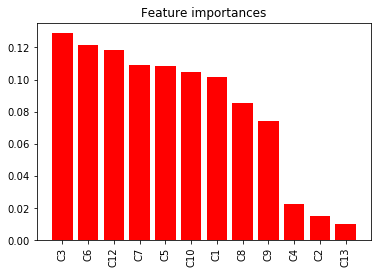

In [368]:
d_first = 12
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

Extremely Randomized Trees

In [369]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.0 0.325


AdaBoost

In [370]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

0.0 0.375


GBT

In [371]:

gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

0.0 0.3
